In [18]:
import numpy as np

# 使用PCA求样本矩阵X的K阶降维矩阵Z
# Note:请保证输入的样本矩阵X shape=(m, n)，m行样例，n个特征

# NumPy实现PCA Detail Version

class PCA_detail():
    def __init__(self, X, K):
        '''
        :param X,样本矩阵X
        :param K,X的降维矩阵的阶数，即X要特征降维成k阶
        '''
        self.X = X       #样本矩阵X
        self.K = K       #K阶降维矩阵的K值
        self.centrX = [] #矩阵X的中心化
        self.C = []      #样本集的协方差矩阵C
        self.U = []      #样本矩阵X的降维转换矩阵
        self.Z = []      #样本矩阵X的降维矩阵Z
        
        self.centrX = self._centralized()
        self.C = self._cov()
        self.U = self._U()
        self.Z = self._Z() #Z=XU求得
        
    def _centralized(self):
        '''矩阵X的中心化'''
        print('样本矩阵X:\n', self.X)
        centrX = []
        mean = np.array([np.mean(attr) for attr in self.X.T]) #样本集的特征均值
        print('样本集的特征均值:\n',mean)
        centrX = self.X - mean ##样本集的中心化
        print('样本矩阵X的中心化centrX:\n', centrX)
        return centrX
        
    def _cov(self):
        '''求样本矩阵X的协方差矩阵C'''
        #样本集的样例总数
        ns = np.shape(self.centrX)[0]
        #样本矩阵的协方差矩阵C
        C = np.dot(self.centrX.T, self.centrX)/(ns - 1)
        print('样本矩阵X的协方差矩阵C:\n', C)
        return C
    
    def _U(self):
        '''求X的降维转换矩阵U, shape=(n,k), n是X的特征维度总数，k是降维矩阵的特征维度'''
        #先求X的协方差矩阵C的特征值和特征向量
        a,b = np.linalg.eig(self.C)
        print('样本集的协方差矩阵C的特征值:\n', a)
        print('样本集的协方差矩阵C的特征向量:\n', b)
        #给出特征值降序的topK的索引序列
        ind = np.argsort(-1*a)
        #构建K阶降维的降维转换矩阵U
        UT = [b[:,ind[i]] for i in range(self.K)]
        U = np.transpose(UT)
        print('%d阶降维转换矩阵U:\n'%self.K, U)
        return U
    
    def _Z(self):
        '''按照Z=XU求降维矩阵Z, shape=(m,k), n是样本总数，k是降维矩阵中特征维度总数'''
        Z = np.dot(self.centrX, self.U)  # 使用中心化后的数据
        print('X shape:', np.shape(self.X))
        print('U shape:', np.shape(self.U))
        print('Z shape:', np.shape(Z))
        print('样本矩阵X的降维矩阵Z:\n', Z)
        return Z
    
             #输出降维后的数据

In [19]:
# 调用PCA_detail类
X = np.array([[-1, 2, 66, -1], [-2, 6, 58, -1], [-3, 8, 45, -2], [1, 9, 36, 1], [2, 10, 62, 1], [3, 5, 83, 2]])  # 导入数据，维度为4
K = 2  # 降维到2维
# K = np.shape(X)[1] - 2  # 降维到K维
pca = PCA_detail(X, K)
print(f'降维后的维度: {K}')
print(pca.Z)

样本矩阵X:
 [[-1  2 66 -1]
 [-2  6 58 -1]
 [-3  8 45 -2]
 [ 1  9 36  1]
 [ 2 10 62  1]
 [ 3  5 83  2]]
样本集的特征均值:
 [ 0.          6.66666667 58.33333333  0.        ]
样本矩阵X的中心化centrX:
 [[ -1.          -4.66666667   7.66666667  -1.        ]
 [ -2.          -0.66666667  -0.33333333  -1.        ]
 [ -3.           1.33333333 -13.33333333  -2.        ]
 [  1.           2.33333333 -22.33333333   1.        ]
 [  2.           3.33333333   3.66666667   1.        ]
 [  3.          -1.66666667  24.66666667   2.        ]]
样本矩阵X的协方差矩阵C:
 [[  5.6          1.2         18.4          3.6       ]
 [  1.2          8.66666667 -26.86666667   1.        ]
 [ 18.4        -26.86666667 271.46666667  10.        ]
 [  3.6          1.          10.           2.4       ]]
样本集的协方差矩阵C的特征值:
 [2.75782074e+02 9.79134027e+00 4.73346129e-02 2.51258487e+00]
样本集的协方差矩阵C的特征向量:
 [[ 0.06761155  0.60143206  0.56775502  0.55799856]
 [-0.09934165  0.68922828 -0.01302825 -0.71758336]
 [ 0.99207082  0.01304165 -0.00945517 -0.1246435 ]
 [ 0.

In [20]:
print(f'降维后的维度: {K}')
print(pca.Z)

降维后的维度: 2
[[  7.96504337  -4.12166867]
 [ -0.43650137  -2.07052079]
 [-13.63653266  -1.86686164]
 [-22.28361821   2.32219188]
 [  3.47849303   3.95193502]
 [ 24.91311585   1.78492421]]


In [10]:
import numpy as np
class PCA_n():
    def __init__(self,n_components):
        self.n_components = n_components
    
    def fit_transform(self,X):
        self.n_features_ = X.shape[1]
        # 求协方差矩阵
        X = X - X.mean(axis=0)
        self.covariance = np.dot(X.T,X)/X.shape[0]
        # 求协方差矩阵的特征值和特征向量
        eig_vals,eig_vectors = np.linalg.eig(self.covariance)
        # 获得降序排列特征值的序号
        idx = np.argsort(-eig_vals)
        # 降维矩阵
        self.components_ = eig_vectors[:,idx[:self.n_components]]
        # 对X进行降维
        return np.dot(X,self.components_)
 
# 调用
pca = PCA_n(n_components=2)
X = np.array([[-1, 2, 66, -1], [-2, 6, 58, -1], [-3, 8, 45, -2], [1, 9, 36, 1], [2, 10, 62, 1], [3, 5, 83, 2]])  # 导入数据，维度为4
newX=pca.fit_transform(X)
print(newX)                  #输出降维后的数据


[[  7.96504337  -4.12166867]
 [ -0.43650137  -2.07052079]
 [-13.63653266  -1.86686164]
 [-22.28361821   2.32219188]
 [  3.47849303   3.95193502]
 [ 24.91311585   1.78492421]]


In [11]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1,2,66,-1], [-2,6,58,-1], [-3,8,45,-2], [1,9,36,1], [2,10,62,1], [3,5,83,2]])  #导入数据，维度为4
pca = PCA(n_components=2)   #降到2维
pca.fit(X)                  #执行
newX=pca.fit_transform(X)   #降维后的数据
print(newX)                  #输出降维后的数据

[[  7.96504337  -4.12166867]
 [ -0.43650137  -2.07052079]
 [-13.63653266  -1.86686164]
 [-22.28361821   2.32219188]
 [  3.47849303   3.95193502]
 [ 24.91311585   1.78492421]]


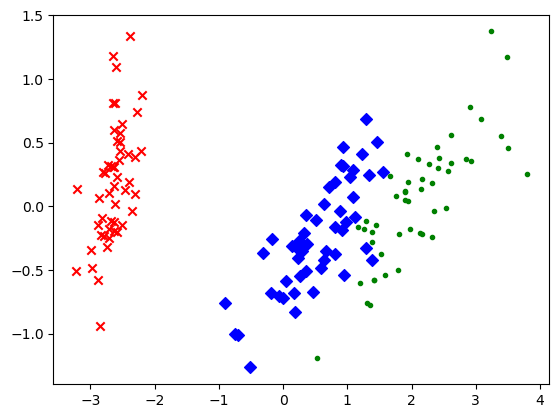

In [28]:
# Iris data set example
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)  # 加载数据，X表示数据集中的特征数据，y表示数据标签

"""
# 使用 return_X_y=False (默认值)
iris = load_iris()
X = iris['data']
y = iris['target']
print(X.shape, y.shape)

# 使用 return_X_y=True
X, y = load_iris(return_X_y=True)
print(X.shape, y.shape)
"""
pca = dp.PCA(n_components=2)  # 使用pca算法，并且将维度降低到2
reduced_x = pca.fit_transform(X)  # 将原始数据进行降维，保存在reduced_x中

red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_x)):  # 遍历所有数据点，将降维后的数据点保存在不同的类别中
    if y[i] == 0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()